In [10]:
import cv2 
import uuid
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from tensorflow import keras
# from tensorflow.keras import layers
# from keras.models import Sequential
# from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
# from keras.preprocessing.image import ImageDataGenerator
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report,confusion_matrix
# from keras.callbacks import ReduceLROnPlateau

Reading data from .csv files

In [4]:
train = pd.read_csv('Tensorflow/workspace/images/train/sign_mnist_train.csv')
test = pd.read_csv('Tensorflow/workspace/images/test/sign_mnist_test.csv')

In [5]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


Adding label and calculating number of datasets for each label

In [6]:
labels = train['label'].values

In [7]:
label_array=np.array(labels)
np.unique(label_array)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

<AxesSubplot:ylabel='count'>

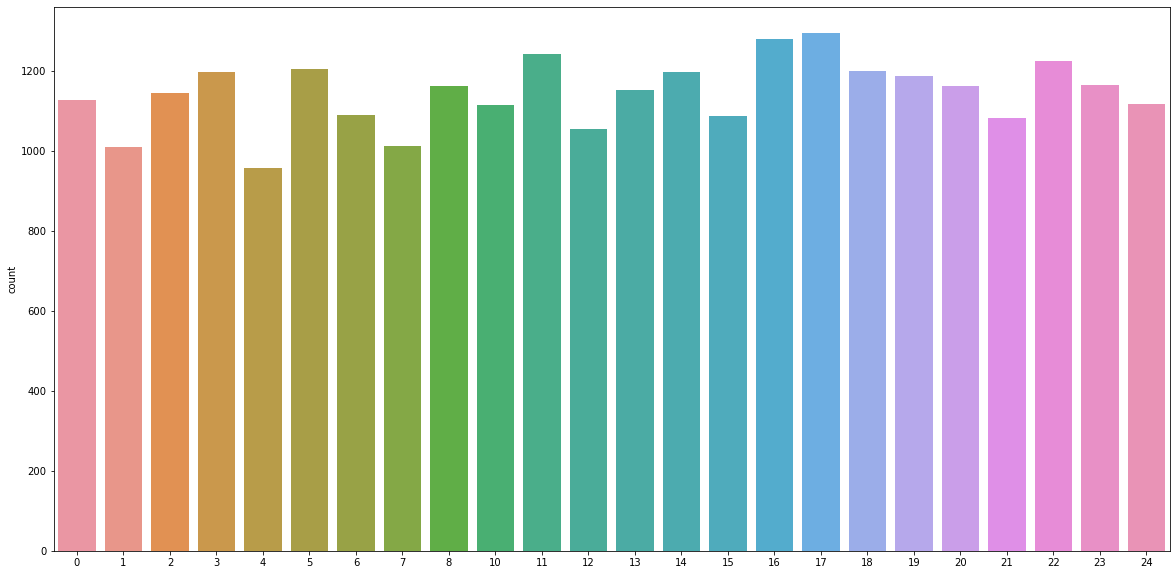

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(x=labels)

Above we can see that each label 0-24 has around 900-1300 images

Refining the data to such that only pixels are left i.e removing labels

In [12]:
train.drop('label',axis = 1,inplace = True)
train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


Extracting Images data from each row in our .csv

In [13]:
images= train.values 
images= np.array([np.reshape(i,(28,28)) for i in images])
images= np.array([i.flatten() for i in images])

Hot one encoding the labels

In [14]:
from sklearn.preprocessing import LabelBinarizer

label_binar = LabelBinarizer()
labels = label_binar.fit_transform(labels)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

View images

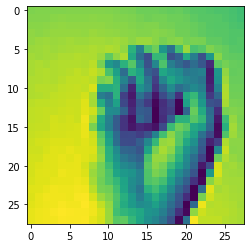

In [15]:
plt.imshow(images[20].reshape(28,28))

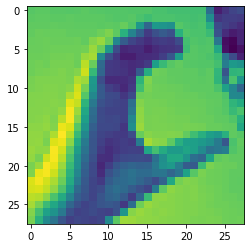

In [16]:
plt.imshow(images[2].reshape(28,28))